In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# 0. Install and Import Dependencies

In [7]:
 pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from fbprophet import Prophet
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import urllib.parse
import datetime as dt
from urllib.parse import quote_plus as urlquote
from functools import reduce
from matplotlib import pyplot as plt

# 1. Read in Data and Process Dates

In [11]:
connection_string = "postgres:Cellxan69$$@localhost:5432/covid_db"
engine = create_engine(f'postgresql://{connection_string}')


In [12]:
df = pd.read_sql_query('SELECT * FROM covid', engine)


In [13]:
df

,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,New Cases,7-Day Moving Avg_x,New Deaths,7-Day Moving Avg_y
0,2020-12-20,Pfizer/BioNTech,556208,556208.0,NaN,NaN,197857,219788,1580,2662
1,2020-12-21,Pfizer/BioNTech,614117,614117.0,NaN,NaN,184799,216765,1749,2657
2,2020-12-23,"Moderna, Pfizer/BioNTech",1008025,1008025.0,NaN,NaN,228748,213876,3468,2688
3,2020-12-26,"Moderna, Pfizer/BioNTech",1944585,1944585.0,NaN,NaN,180759,189742,1277,2243
4,2020-12-28,"Moderna, Pfizer/BioNTech",2127143,2127143.0,NaN,NaN,171445,180766,1777,2222
...,...,...,...,...,...,...,...,...,...,...
63,2021-03-07,"Johnson&Johnson, Moderna, Pfizer/BioNTech",90351750,58873710.0,30686881.0,17.60,41606,57813,848,1697
64,2021-03-08,"Johnson&Johnson, Moderna, Pfizer/BioNTech",92089852,60005231.0,31493040.0,17.94,124266,68312,844,1635
65,2021-03-09,"Johnson&Johnson, Moderna, Pfizer/BioNTech",93692598,61088527.0,32102061.0,18.27,52815,68092,1503,1547
66,2021-03-10,"Johnson&Johnson, Moderna, Pfizer/BioNTech",95721290,62451150.0,32904161.0,18.67,60375,67178,1516,1484


In [14]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,New Cases,7-Day Moving Avg_x,New Deaths,7-Day Moving Avg_y
count,6.800000e+01,6.700000e+01,5.300000e+01,55.000000,68.000000,68.000000,68.000000,68.000000
mean,4.068729e+07,2.947171e+07,1.431403e+07,10.514909,130851.588235,134589.794118,2652.235294,2638.132353
std,2.958002e+07,1.874995e+07,1.020133e+07,4.674790,69324.558955,63952.097687,1113.518655,581.107201
min,5.562080e+05,5.562080e+05,1.342086e+06,2.690000,41606.000000,57813.000000,844.000000,1447.000000
25%,1.485049e+07,1.393312e+07,5.259693e+06,6.660000,69689.250000,67268.500000,1737.250000,2080.750000
50%,3.601146e+07,2.890950e+07,1.208583e+07,10.380000,119332.000000,126817.000000,2359.500000,2786.500000
75%,6.439113e+07,4.434154e+07,2.261336e+07,13.945000,181769.000000,188659.750000,3640.250000,3115.750000
max,9.820389e+07,6.407167e+07,3.386313e+07,19.160000,314180.000000,249377.000000,5501.000000,3378.000000


In [15]:
df.dtypes

date                             datetime64[ns]
vaccine                                  object
total_vaccinations                        int64
people_vaccinated                       float64
people_fully_vaccinated                 float64
people_vaccinated_per_hundred           float64
New Cases                                 int64
7-Day Moving Avg_x                        int64
New Deaths                                int64
7-Day Moving Avg_y                        int64
dtype: object

In [16]:
df.sort_values(by=['state'],inplace=False, ascending=True)
#total_cases = df["state"].sum()


KeyError: 'state'

In [ ]:
per_hundred= df[df['date']=='2021-03-03']
per_hundred

In [ ]:
total_cases = per_hundred["tot_cases"]
print('Total Number of cases by state')
tot_cases = per_hundred.groupby('state')['tot_cases'].sum().sort_values(ascending=False).to_frame()
tot_cases.style.background_gradient(cmap='Blues_r')

In [17]:
total_death = per_hundred["tot_death"]
print('Total Number of deaths by state')
tot_death = per_hundred.groupby('state')['tot_death'].sum().sort_values(ascending=False).to_frame()
tot_death.style.background_gradient(cmap='Blues_r')

NameError: name 'per_hundred' is not defined

In [18]:
per_hundred= df[df['date']=='2021-03-03']
per_hundred

,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,New Cases,7-Day Moving Avg_x,New Deaths,7-Day Moving Avg_y
59,2021-03-03,"Moderna, Pfizer/BioNTech",80540474,52855579.0,26957804.0,15.8,66769,62764,1955,1931


In [19]:
total_vac = per_hundred["people_vaccinated_per_hundred"]
print('Total Number of people vaccinated per 100 by state')
tot_vac = per_hundred.groupby('state')['people_vaccinated_per_hundred'].max().sort_values(ascending=False).to_frame()
tot_vac.style.background_gradient(cmap='Blues_r')

Total Number of people vaccinated per 100 by state


KeyError: 'state'

In [20]:
penn = df[df['state']=='PA']
penn

KeyError: 'state'

In [21]:
penn.query('people_vaccinated_per_hundred != people_vaccinated_per_hundred')

NameError: name 'penn' is not defined

In [22]:
penn['people_vaccinated_per_hundred']=penn['people_vaccinated_per_hundred'].fillna(method='ffill')

NameError: name 'penn' is not defined

In [23]:
penn1=penn.filter(['date','people_vaccinated_per_hundred'])
penn1

NameError: name 'penn' is not defined

NameError: name 'penn' is not defined

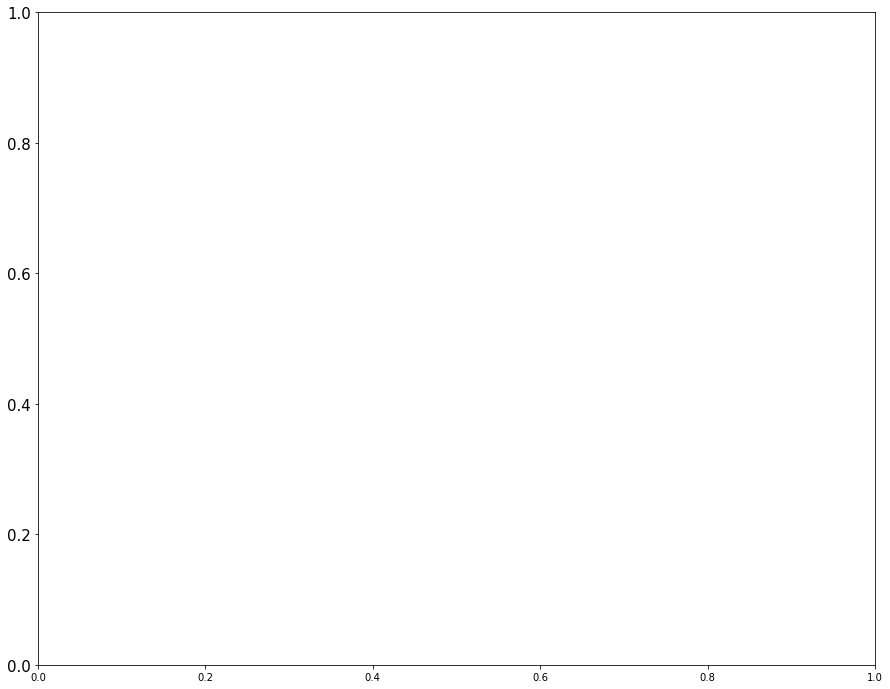

In [24]:
plt.figure(figsize=(15,12))
plt.xticks(size=10)
plt.yticks(size=15)
plt.plot(penn['date'], penn['tot_cases'])
plt.show()

In [ ]:
import numpy as np

In [ ]:
penn["people_vaccinated_per_hundred"] = np.log(penn['people_vaccinated_per_hundred'])

In [25]:
plt.figure(figsize=(15,12))
lt.xticks(size=15)
plt.yticks(size=15)
plt.plot(penn['date'], penn['people_vaccinated_per_hundred'])
plt.show()

NameError: name 'lt' is not defined

<Figure size 1080x864 with 0 Axes>

In [ ]:
#plt.figure(figsize=(15,12))
#plt.xticks(size=15)
#plt.yticks(size=15)
#plt.plot(penn['date'], penn['death'])
#plt.show()

In [ ]:
#cali_cases = cali.colomns = ['date', 'cases']
#cali_cases

In [ ]:
#penn_cases = penn.drop(["death_Increase", "hospitalized", "positive_Increase",
#"hospitalized_Increase","totalTestResults","total_vaccinations",
#"people_fully_vaccinated","daily_vaccinations_per_million","people_vaccinated", "people_fully_vaccinated_per_hundred"
#, "distributed_per_hundred","state","death", "daily_vaccinations"],axis=1)


In [ ]:
#penn_cases = penn.drop(['total_vaccinations_per_hundred'],axis=1)

In [62]:
penn_cases= penn[['date', 'people_vaccinated_per_hundred']]
penn_cases

,date,people_vaccinated_per_hundred
51,2021-03-09,2.931727
58,2021-02-13,2.293544
63,2021-02-09,2.181547
97,2021-02-25,2.623944
119,2021-02-10,2.218116
121,2021-01-25,1.609438
153,2021-02-22,2.585506
184,2021-02-18,2.446685
193,2021-02-26,2.646175
205,2021-01-24,1.564441


In [63]:
penn1 = penn1.rename(columns = {'date' : 'ds','people_vaccinated_per_hundred': 'y'})
penn1

,ds,y
51,2021-03-09,18.76
58,2021-02-13,9.91
63,2021-02-09,8.86
97,2021-02-25,13.79
119,2021-02-10,9.19
121,2021-01-25,5.00
153,2021-02-22,13.27
184,2021-02-18,11.55
193,2021-02-26,14.10
205,2021-01-24,4.78


In [34]:
us_df = pd.read_sql_query('SELECT * FROM us', engine)
us_df

,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_vaccinated_per_hundred,New Cases,7-Day Moving Avg_x,New Deaths,7-Day Moving Avg_y
0,2020-12-20,Pfizer/BioNTech,556208,556208.0,NaN,NaN,197857,219788,1580,2662
1,2020-12-21,Pfizer/BioNTech,614117,614117.0,NaN,NaN,184799,216765,1749,2657
2,2020-12-23,"Moderna, Pfizer/BioNTech",1008025,1008025.0,NaN,NaN,228748,213876,3468,2688
3,2020-12-26,"Moderna, Pfizer/BioNTech",1944585,1944585.0,NaN,NaN,180759,189742,1277,2243
4,2020-12-28,"Moderna, Pfizer/BioNTech",2127143,2127143.0,NaN,NaN,171445,180766,1777,2222
...,...,...,...,...,...,...,...,...,...,...
63,2021-03-07,"Johnson&Johnson, Moderna, Pfizer/BioNTech",90351750,58873710.0,30686881.0,17.60,41606,57813,848,1697
64,2021-03-08,"Johnson&Johnson, Moderna, Pfizer/BioNTech",92089852,60005231.0,31493040.0,17.94,124266,68312,844,1635
65,2021-03-09,"Johnson&Johnson, Moderna, Pfizer/BioNTech",93692598,61088527.0,32102061.0,18.27,52815,68092,1503,1547
66,2021-03-10,"Johnson&Johnson, Moderna, Pfizer/BioNTech",95721290,62451150.0,32904161.0,18.67,60375,67178,1516,1484


In [35]:
us_df= us_df.drop(columns=["total_vaccinations",
                    "vaccine", 
                    "people_fully_vaccinated",
                    "New Cases",
                    "7-Day Moving Avg_x",
                    "New Deaths",
                    "7-Day Moving Avg_y"])



In [36]:
us_df= us_df[['date', 'people_vaccinated_per_hundred']]


In [37]:
us_df

,date,people_vaccinated_per_hundred
0,2020-12-20,NaN
1,2020-12-21,NaN
2,2020-12-23,NaN
3,2020-12-26,NaN
4,2020-12-28,NaN
...,...,...
63,2021-03-07,17.60
64,2021-03-08,17.94
65,2021-03-09,18.27
66,2021-03-10,18.67


In [47]:
us_df = us_df.rename(columns = {'date' : 'ds','people_vaccinated_per_hundred': 'y'})
us_df

,ds,y
0,2020-12-20,NaN
1,2020-12-21,NaN
2,2020-12-23,NaN
3,2020-12-26,NaN
4,2020-12-28,NaN
...,...,...
63,2021-03-07,17.60
64,2021-03-08,17.94
65,2021-03-09,18.27
66,2021-03-10,18.67


# 2. Train Model

In [49]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(us_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [50]:
m.params


{'k': array([[0.38506622]]),
 'm': array([[0.00812255]]),
 'delta': array([[ 1.94438696e-01,  1.15596884e-01,  1.35434292e-01,
          6.63073616e-06,  5.50210019e-02,  8.22068023e-04,
          3.67093231e-09, -6.97509549e-04, -5.12594403e-02,
         -4.28547593e-02,  1.20149274e-08,  1.05208988e-01,
          2.89940839e-09, -3.37784151e-04, -1.75317753e-04,
         -2.05415349e-02, -6.57731834e-04, -1.57756957e-01,
         -1.04503382e-01, -6.07665580e-04,  1.24530883e-05,
          1.99485473e-01,  1.90240241e-02,  4.12425139e-04,
          4.13974379e-01]]),
 'sigma_obs': array([[0.00144925]]),
 'beta': array([[ 2.02202863e-03, -5.03757556e-03, -7.55016652e-04,
          5.58753942e-04,  2.65241936e-04, -1.51688350e-04,
          2.59863334e-06,  3.24911701e-02,  5.19729984e-06,
          3.24911702e-02, -7.72654658e-06,  3.24911702e-02,
          1.03946405e-05,  3.24911702e-02]]),
 'trend': array([[0.00812255, 0.0146491 , 0.02770219, 0.03752431, 0.08464986,
         0.0964

# 3. Forecast Away

In [59]:
future = m.make_future_dataframe(periods=250)


In [60]:
future.tail()

,ds
313,2021-11-12
314,2021-11-13
315,2021-11-14
316,2021-11-15
317,2021-11-16


In [61]:
forecast= m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-20,-2.595442,-0.028564,0.076633,-2.595442,-2.595442,2.617481,2.617481,2.617481,2.490123,2.490123,2.490123,0.127357,0.127357,0.127357,0.0,0.0,0.0,0.022039
1,2020-12-21,-2.470393,0.028939,0.134591,-2.470393,-2.470393,2.551332,2.551332,2.551332,2.490123,2.490123,2.490123,0.061209,0.061209,0.061209,0.0,0.0,0.0,0.080939
2,2020-12-23,-2.220296,0.135301,0.248069,-2.220296,-2.220296,2.411789,2.411789,2.411789,2.490123,2.490123,2.490123,-0.078334,-0.078334,-0.078334,0.0,0.0,0.0,0.191493
3,2020-12-26,-1.845150,0.641658,0.745392,-1.845150,-1.845150,2.540217,2.540217,2.540217,2.490123,2.490123,2.490123,0.050094,0.050094,0.050094,0.0,0.0,0.0,0.695068
4,2020-12-28,-1.595053,0.904239,1.011409,-1.595053,-1.595053,2.551332,2.551332,2.551332,2.490123,2.490123,2.490123,0.061209,0.061209,0.061209,0.0,0.0,0.0,0.956280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2021-11-12,116.111741,39.289980,207.243237,36.782718,204.764975,2.448572,2.448572,2.448572,2.490123,2.490123,2.490123,-0.041552,-0.041552,-0.041552,0.0,0.0,0.0,118.560313
314,2021-11-13,116.516086,39.349080,208.243487,36.799054,205.686452,2.540217,2.540217,2.540217,2.490123,2.490123,2.490123,0.050094,0.050094,0.050094,0.0,0.0,0.0,119.056303
315,2021-11-14,116.920430,39.397104,209.219634,36.831488,206.604849,2.617481,2.617481,2.617481,2.490123,2.490123,2.490123,0.127357,0.127357,0.127357,0.0,0.0,0.0,119.537911
316,2021-11-15,117.324775,39.409255,210.097686,36.863923,207.524271,2.551332,2.551332,2.551332,2.490123,2.490123,2.490123,0.061209,0.061209,0.061209,0.0,0.0,0.0,119.876107


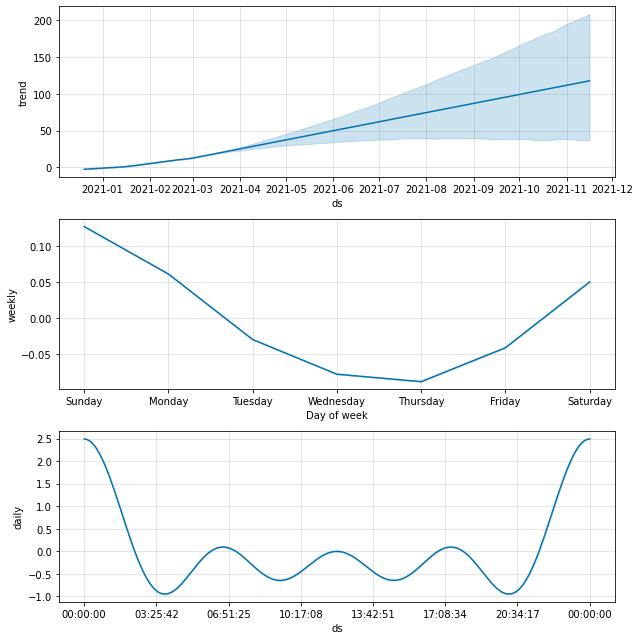

In [63]:
fig2 = m.plot_components(forecast)

In [30]:
#penn2=penn.filter(['date','share_doses_used'])
#penn2

In [45]:
3penn2 = penn2.rename(columns = {'date' : 'ds','share_doses_used': 'y'})
#penn2

SyntaxError: invalid syntax (<ipython-input-45-d480739e9b05>, line 1)

In [32]:
#m = Prophet()
#m.add_regressor('add1',standardize=False)
#m.fit(penn1)

In [33]:
#m.params


In [34]:
#future = m.make_future_dataframe(periods=200)


NameError: name 'm' is not defined

In [35]:
#future.tail()


In [36]:
#forecast= m.predict(future)


In [37]:
#forecast


In [38]:
#fig2 = m.plot_components(forecast)

In [39]:
# Calculating the RMSE of the model
#3from math import sqrt
#from sklearn.metrics import mean_squared_error


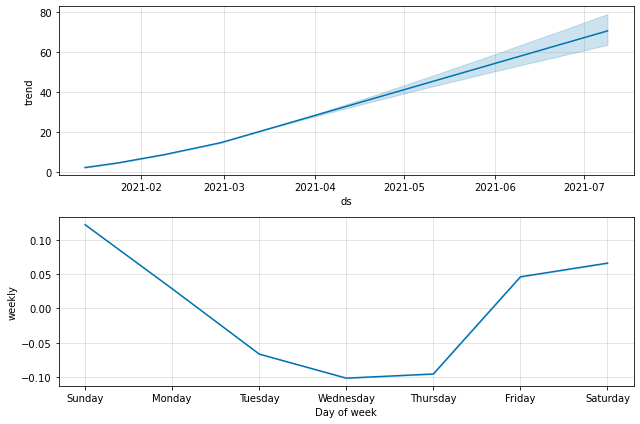